# 데이터 로드

In [1]:
#변수별 정보

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

titanic_df = pd.read_csv('titanic_train.csv')
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


- passengerid : 탑승자 데이터 일련번호
- survived : 생존여부 0=사망, 1=생존
- Pclass : 티켓 등급 1=일등석,2=이등석,3=삼등석
- sex : 성별
- name : 이름
- sibsp : 함께 탑승한 형제자매 or 배우자 인원수
- parch : 함께 탑승한 부모님 or 어린이 인원수 
- ticket : 티켓 번호
- fare : 요금
- cabin : 선실 번호
- embarked : 중간 정착 항구 C=Cherbourg, Q= Queenstown, S=Southampton

In [2]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#데이터 전처리

In [3]:
# Null값 개수 확인
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
## 데이터 전처리 : 결측치 처리

#Null값 처리

titanic_df['Age'].fillna(titanic_df['Age'].mean, inplace=True)
titanic_df['Cabin'].fillna("N",inplace=True)
titanic_df['Embarked'].fillna("N",inplace=True)

titanic_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [ ]:
# 문자열 변수(피쳐) 빈도 분포 확인 : value_counts()
# sex, cabin, embarked
print('Sex분포 : \n', titanic_df['Sex'].value_counts())
print('cabin분포 : \n', titanic_df['Cabin'].value_counts())
print('embarked분포 : \n', titanic_df['Embarked'].value_counts())

In [5]:
# cabin value를 선실 등급만으로 표기
titanic_df['Cabin']=titanic_df['Cabin'].str[0]

# 선실등급 별 개수 확인
titanic_df['Cabin'].value_counts()

N    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin, dtype: int64

## 성별에 따른 생존자 수 분포(EDA)

In [6]:
# 성별에 따른 생존자 수 분포 : groupby 로 묶어서 보기
titanic_df.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

### 성별에 따른 생존자 수 분포 막대그래프 시각화

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

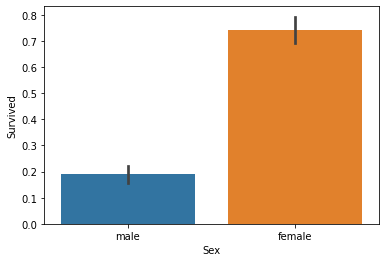

In [7]:
sns.barplot(x='Sex',y='Survived',data = titanic_df)

### 부자와 가난한 사람 간의 생존 확률

- 부의 측정 기준 : 객실등급
- 객실 등급별 성별에 따른 생존확률

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

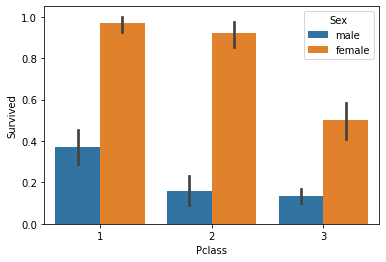

In [8]:
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=titanic_df)

- 여성은 1,2등실에 대한 생존확률차가 크지 않으나 3등실의 경우 생존확률이 상대적으로 낮다
- 남성의 경우 1등실의 생존활률이 이,삼등실보다 상대적으로 높다

### Age에 따른 생존확률  : 수치형 -> 범주형으로 바꾸기

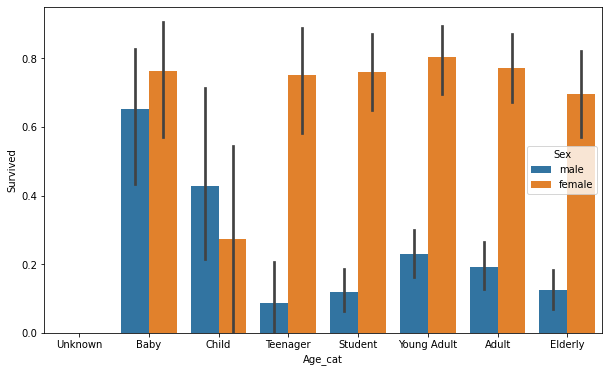

In [27]:
# 입력 age에 따라 구분값을 반환하는 함수 설정. DataFrame의 apply lambda식에 사용. 
def get_category(age):
    cat = ''
    if age <= -1: cat = 'Unknown'
    elif age <= 5: cat = 'Baby'
    elif age <= 12: cat = 'Child'
    elif age <= 18: cat = 'Teenager'
    elif age <= 25: cat = 'Student'
    elif age <= 35: cat = 'Young Adult'
    elif age <= 60: cat = 'Adult'
    else : cat = 'Elderly'
    
    return cat

# 막대그래프의 크기 figure를 더 크게 설정 
plt.figure(figsize=(10,6))

#X축의 값을 순차적으로 표시하기 위한 설정 
group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Elderly']

# lambda 식에 위에서 생성한 get_category( ) 함수를 반환값으로 지정. 
# get_category(X)는 입력값으로 'Age' 컬럼값을 받아서 해당하는 cat 반환
titanic_df['Age_cat'] = titanic_df['Age'].apply(lambda x : get_category(x))
sns.barplot(x='Age_cat', y = 'Survived', hue='Sex', data=titanic_df, order=group_names)
titanic_df.drop('Age_cat', axis=1, inplace=True)

## Encoding

- fit(), transform()

In [10]:
from sklearn import preprocessing

def encode_features(dataDF):
    features = ['Cabin','Sex','Embarked']
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(dataDF[feature])
        dataDF[feature] = le.transform(dataDF[feature])
        
    return dataDF

titanic_df = encode_features(titanic_df)
titanic_df.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.25,7,3


## 데이터 전처리 : 삭제

In [11]:
def fillna(df):
    df['Age'].fillna(df['Age'].mean(),inplace=True)
    df['Cabin'].fillna('N', inplace=True)
    df['Embarked'].fillna('N',inplace=True)
    df['Fare'].fillna(0,inplace=True)
    return df

#알고리즘 불필요한 속성 제거

def drop_features(df):
    df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)
    return df

#레이블 인코딩 수행

def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1] # 첫문자만 추출
    features = ['Cabin','Sex','Embarked']
    for feature in features : 
        le = preprocessing.LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

# 앞에서 설정한 dataFrame 함수 호출

def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

데이터 로드

In [12]:
titanic_df = pd.read_csv('titanic_train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived',axis=1)

X_titanic_df = transform_features(X_titanic_df)

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_titanic_df,y_titanic_df,test_size=0.2,random_state=11)

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

#결정트리, 랜덤포레스트, 로지스틱회귀를 위한 객체생성
dt_clf = DecisionTreeClassifier(random_state=11)
rf_clf = RandomForestClassifier(random_state=11)
lr_clf = LogisticRegression()

#결정트리 학습
dt_clf.fit(X_train,y_train)
#예측
dt_pred=dt_clf.predict(X_test)
#평가
print('결정트리 정확도 :{0:.4f}'.format(accuracy_score(y_test,dt_pred)))

#랜덤포레스트 학습
rf_clf.fit(X_train,y_train)
#예측
rf_pred=rf_clf.predict(X_test)
#평가
print('랜덤포레스트 정확도 :{0:.4f}'.format(accuracy_score(y_test,rf_pred)))

#로지스틱회기 학습
lr_clf.fit(X_train,y_train)
#예측
lr_pred=lr_clf.predict(X_test)
#평가
print('로지스틱회기 정확도 :{0:.4f}'.format(accuracy_score(y_test,lr_pred)))

결정트리 정확도 :0.7877
랜덤포레스트 정확도 :0.8547
로지스틱회기 정확도 :0.8492


C:\Users\pc\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


교차검증 결정트리 모델 평가

In [17]:
from sklearn.model_selection import KFold

def exec_kfold(clf,folds=5):
    # 폴드 세트를 5개인 kfold 객체 생성, 폴드 수만큼 예측결과 저장을 위한 리스트 객체 생성
    kfold = KFold(n_splits=folds)
    scores = []
    
    # KFold 교차검증 수행
    for iter_n,(train_index, test_index) in enumerate(kfold.split(X_titanic_df)):
        # X_titanic_df 데이터에서 교차 검증별 학습과 검증 데이터를 가리키는 index 생성
        X_train, X_test = X_titanic_df.values[train_index],X_titanic_df.values[test_index]
        y_train, y_test = y_titanic_df.values[train_index],y_titanic_df.values[test_index]
        #Classfier 학습,예측, 정확도 계산
        clf.fit(X_train,y_train)
        predictions = clf.predict(X_test)
        accuracy = accuracy_score(y_test,predictions)
        scores.append(accuracy)
        print('교차검증{0}정확도 : {1:.4f}'.format(iter_n,accuracy))
        
        # 5개의 fold 평균 정확도
    mean_score = np.mean(scores)
    print('평균정확도 : {0:.4f}'.format(mean_score))

# exec_kfold 호출
exec_kfold(dt_clf,folds=5)

교차검증0정확도 : 0.7542
교차검증1정확도 : 0.7809
교차검증2정확도 : 0.7865
교차검증3정확도 : 0.7697
교차검증4정확도 : 0.8202
평균정확도 : 0.7823


In [18]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(dt_clf,X_titanic_df,y_titanic_df,cv=5)
for iter_n,accuracy in enumerate(scores):
   print('교차검증 {0} 정확도:{1:.4f} '.format(iter_n,accuracy))

print('평균 정확도:{0:.4f}'.format(np.mean(scores)))

교차검증 0 정확도:0.7430 
교차검증 1 정확도:0.7753 
교차검증 2 정확도:0.7921 
교차검증 3 정확도:0.7865 
교차검증 4 정확도:0.8427 
평균 정확도:0.7879


In [19]:
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth':[2,3,5,10],
             'min_samples_split':[2,3,5],
             'min_samples_leaf':[1,5,8]}

grid_dclf = GridSearchCV(dt_clf,param_grid=parameters, scoring='accuracy', cv=5)
grid_dclf.fit(X_train,y_train)

print('GridSearchCV 최적 하이퍼 파라미터:', grid_dclf.best_params_)
print('GridSearchCV 최고 정확도:{0:.4f}'.format(grid_dclf.best_score_))

best_dclf = grid_dclf.best_estimator_
#최적 하이퍼 파라미터로 학습된 Estimator로 예측 및 평가 수행
dpredictions = best_dclf.predict(X_test)
accuracy = accuracy_score(y_test,dpredictions)

print('테스트 세트에서의 DecisionTreeClassfier 정확도: ', accuracy)

GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
GridSearchCV 최고 정확도:0.7992
테스트 세트에서의 DecisionTreeClassfier 정확도:  0.8715083798882681


In [28]:
import numpy as np
from sklearn.base import BaseEstimator

class MyDummyClassifier(BaseEstimator):
    # fit( ) 메소드는 아무것도 학습하지 않음. 
    def fit(self, X , y=None):
        pass
    
    # predict( ) 메소드는 단순히 Sex feature가 1 이면 0 , 그렇지 않으면 1 로 예측함. 
    def predict(self, X):
        pred = np.zeros( ( X.shape[0], 1 ))
        for i in range (X.shape[0]) :
            if X['Sex'].iloc[i] == 1:
                pred[i] = 0
            else :
                pred[i] = 1
        
        return pred

In [30]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Null 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(),inplace=True)
    df['Cabin'].fillna('N',inplace=True)
    df['Embarked'].fillna('N',inplace=True)
    df['Fare'].fillna(0,inplace=True)
    return df

# 머신러닝 알고리즘에 불필요한 속성 제거
def drop_features(df):
    df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)
    return df

# 레이블 인코딩 수행. 
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin','Sex','Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

# 앞에서 설정한 Data Preprocessing 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 원본 데이터를 재로딩, 데이터 가공, 학습데이터/테스트 데이터 분할. 
titanic_df = pd.read_csv('./titanic_train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df= titanic_df.drop('Survived', axis=1)
X_titanic_df = transform_features(X_titanic_df)
X_train, X_test, y_train, y_test=train_test_split(X_titanic_df, y_titanic_df, \
                                                  test_size=0.2, random_state=0)

# 위에서 생성한 Dummy Classifier를 이용하여 학습/예측/평가 수행. 
myclf = MyDummyClassifier()
myclf.fit(X_train ,y_train)

mypredictions = myclf.predict(X_test)
print('Dummy Classifier의 정확도는: {0:.4f}'.format(accuracy_score(y_test , mypredictions)))


Dummy Classifier의 정확도는: 0.7877


In [32]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd

class MyFakeClassifier(BaseEstimator):
    def fit(self,X,y):
        pass
    
    # 입력값으로 들어오는 X 데이터 셋의 크기만큼 모두 0값으로 만들어서 반환
    def predict(self,X):
        return np.zeros( (len(X), 1) , dtype=bool)

# 사이킷런의 내장 데이터 셋인 load_digits( )를 이용하여 MNIST 데이터 로딩
digits = load_digits()

print(digits.data)
print("### digits.data.shape:", digits.data.shape)
print(digits.target)
print("### digits.target.shape:", digits.target.shape)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
### digits.data.shape: (1797, 64)
[0 1 2 ... 8 9 8]
### digits.target.shape: (1797,)


In [38]:
digits.target==7

array([False, False, False, ..., False, False, False])

In [39]:
y=(digits.target == 7).astype(int)

In [41]:
# test_size를 쓰지 않으면 0.25
X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state=11)

In [45]:
#불균형한 레이블 데이터 분포도 확인.
pd.Series(y_test).value_counts()

0    405
1     45
dtype: int64

In [69]:
#Dummy Classifier로 학습/예측/정확도 평가

fake_cl = MyFakeClassifier()
fake_cl.fit(X_train,y_train)
fakePred = fack_cl.predict(X_test)
accuracy = accuracy_score(y_test,fakePred)

print('정확도 :',np.round((accuracy),3) )

정확도 : 0.615


In [70]:
#confusion Matrix
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test,fakePred)

array([[110,   0],
       [ 69,   0]], dtype=int64)

In [71]:
# 
import numpy as np
from sklearn.base import BaseEstimator

class MyDummyClassifier(BaseEstimator):
    # fit( ) 메소드는 아무것도 학습하지 않음. 
    def fit(self, X , y=None):
        pass
    
    # predict( ) 메소드는 단순히 Sex feature가 1 이면 0 , 그렇지 않으면 1 로 예측함. 
    def predict(self, X):
        return np.zeros( ( len[X], 1 ),dtype=bool)

digits= load_digits()
y= (digits.target ==7).astype(int)
X_train,X_test,y_train,y_test = train_test_split(digits.data,y,random_state=11)
fakeclf = MyFakeClassifier()
fakeclf.fit(X_train,y_train)
fakepred = fakeclf.predict(X_test)

In [72]:
fakepred.astype(int).sum()

0

In [73]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

def get_clf_eval(y_test,pred):
    confusion = confusion_matrix(y_test,pred) #오차행렬
    accuracy = accuracy_score(y_test,pred) # 정확도
    precision = precision_score(y_test,pred) # 정밀도
    recall = recall_score(y_test,pred) # 재현율

    print('오차행렬 :\n',confusion)
    print('정확도 : {0:.4f}'.format(accuracy))
    print('정밀도 :',precision)
    print('재현율 :',recall)

In [74]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 원본 데이터를 재로딩, 데이터 가공, 학습데이터/테스트 데이터 분할. 
titanic_df = pd.read_csv('./titanic_train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df= titanic_df.drop('Survived', axis=1)
X_titanic_df = transform_features(X_titanic_df)
X_train, X_test, y_train, y_test=train_test_split(X_titanic_df, y_titanic_df, \
                                                  test_size=0.2, random_state=0)

# 위에서 생성한 Dummy Classifier를 이용하여 학습/예측/평가 수행. 
lrclf = LogisticRegression()
lrclf.fit(X_train,y_train)
pred=lrclf.predict(X_test)
get_clf_eval(y_test,pred)

오차행렬 :
 [[92 18]
 [16 53]]
정확도 : 0.8101
정밀도 : 0.7464788732394366
재현율 : 0.7681159420289855


C:\Users\pc\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [75]:
# predict_proba() :  0, 1 의 확률을 보여줌

pred_proba = lrclf.predict_proba(X_test)
pred_proba[:10]

array([[0.85127656, 0.14872344],
       [0.89229967, 0.10770033],
       [0.93311939, 0.06688061],
       [0.05349063, 0.94650937],
       [0.31332509, 0.68667491],
       [0.49059842, 0.50940158],
       [0.0822201 , 0.9177799 ],
       [0.06469866, 0.93530134],
       [0.41255002, 0.58744998],
       [0.29149245, 0.70850755]])

In [77]:
pred = lr_clf.predict(X_test)

In [78]:
pred_proba_result = np.concatenate([pred_proba, pred.reshape(-1,1)], axis=1)

print('두 개의 class 중 더 큰 확률을 클래스 값으로 예측')
print(pred_proba_result)

두 개의 class 중 더 큰 확률을 클래스 값으로 예측
[[0.85127656 0.14872344 0.        ]
 [0.89229967 0.10770033 0.        ]
 [0.93311939 0.06688061 0.        ]
 [0.05349063 0.94650937 1.        ]
 [0.31332509 0.68667491 1.        ]
 [0.49059842 0.50940158 1.        ]
 [0.0822201  0.9177799  1.        ]
 [0.06469866 0.93530134 1.        ]
 [0.41255002 0.58744998 1.        ]
 [0.29149245 0.70850755 1.        ]
 [0.91284628 0.08715372 0.        ]
 [0.26908456 0.73091544 1.        ]
 [0.88018451 0.11981549 0.        ]
 [0.09166818 0.90833182 1.        ]
 [0.03353731 0.96646269 1.        ]
 [0.23062761 0.76937239 1.        ]
 [0.86101337 0.13898663 0.        ]
 [0.76364171 0.23635829 0.        ]
 [0.91228723 0.08771277 0.        ]
 [0.63771463 0.36228537 0.        ]
 [0.66798355 0.33201645 0.        ]
 [0.0532712  0.9467288  1.        ]
 [0.88018639 0.11981361 0.        ]
 [0.56675265 0.43324735 0.        ]
 [0.29665533 0.70334467 1.        ]
 [0.1037613  0.8962387  1.        ]
 [0.90140969 0.09859031 0.      

In [85]:
from sklearn.preprocessing import Binarizer

# Binarizer :  넘파이 ndarray 입력값을 지정된 threeshold 보다 같거나 작으면 0값으로, 
#높으면 1로 변환해서 반환

X=[[3,5,7],
  [2,8,4],
  [0,1.5,8]]
# threshold 기준값보다 작으면 0을 , 높으면 1을 반환
binarizer = Binarizer(threshold=5)
print(binarizer.fit_transform(X))


[[0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [81]:
from sklearn.preprocessing import Binarizer

#binarizer의 threshold 설정값, 분류결정 임계값 = 0.5 로 설정
threshold=0.4

# predict_proba()반환값([0확률 1확률])의 두번째 컬럼,
# 즉 positive 클래스 컬럼 하나만 추출하여 binarizer를 적용
pred_proba_1 = pred_proba[:,1].reshape(-1,1)

bina = Binarizer(threshold=threshold).fit(pred_proba_1)
custom_predict = bina.transform(pred_proba_1)
get_clf_eval(y_test, custom_predict)

오차행렬 :
 [[86 24]
 [13 56]]
정확도 : 0.7933
정밀도 : 0.7
재현율 : 0.8115942028985508


In [95]:
from sklearn.metrics import precision_recall_curve
pred_proba_class1=lr_clf.predict_proba(X_test)[:,1]

precisions, recalls, thresholds = precision_recall_curve(y_test,pred_proba_class1)
idx=np.arange(0,thresholds.shape[0],15)
print('반환되는 인덱스: ',idx)
print('임계값 sample : ',np.round(thresholds[idx],3))
print('정밀도 sample : ',np.round(precisions[idx],3))
print('재현율 sample : ',np.round(recalls[idx],3))

반환되는 인덱스:  [  0  15  30  45  60  75  90 105 120 135 150]
임계값 sample :  [0.075 0.107 0.123 0.15  0.21  0.311 0.449 0.587 0.651 0.793 0.917]
정밀도 sample :  [0.401 0.42  0.467 0.529 0.59  0.678 0.733 0.817 0.844 1.    1.   ]
재현율 sample :  [1.    0.957 0.928 0.928 0.899 0.884 0.797 0.71  0.551 0.435 0.217]


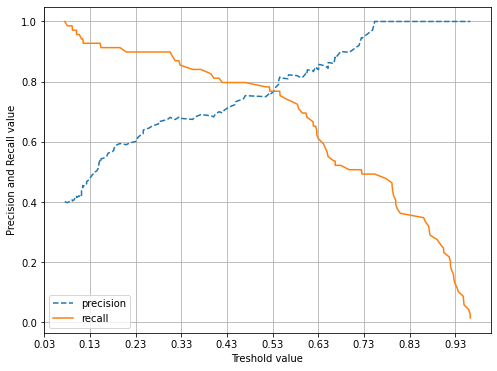

In [97]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

# y_test 실제값 pred proba_c1: 예측 확률 값
def precision_recall_curve_plot(y_test,pred_proba_c1):
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)
    
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary], label='recall')
    
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start,end,0.1),2))
    
    plt.xlabel('Treshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()

precision_recall_curve_plot(y_test,lr_clf.predict_proba(X_test)[:,1])

F1 SCORE

- 정밀도와 재현율의 조화평균
- 정밀도와 재현율이 어느 한쪽으로 치우치지 않는 수치를 나타낼때 상대적으로 높은 값을 가짐


In [100]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score

def get_clf_eval(y_test,pred):
    confusion = confusion_matrix(y_test,pred) #오차행렬
    accuracy = accuracy_score(y_test,pred) # 정확도
    precision = precision_score(y_test,pred) # 정밀도
    recall = recall_score(y_test,pred) # 재현율
    
    #F1스코어 추가
    f1 = f1_score(y_test,pred)
    print('오차행렬 :\n',confusion)
    print('정확도 : {0:.4f}, 정밀도 :{1:.4f}, 재현율:{2:.4f}, F1:{3:.4f}'.format(accuracy, precision,recall,f1))
    

In [101]:
# 임계값이 0.4~0.6별로 정확도,정밀도, 재현율, F1 스코어 확인
thresholds=[0.4,0.45,0.50,0.55,0.60]
pred_proba = lr_clf.predict_proba(X_test)
get_eval_by_threshold(y_test,pred_proba[:,1].reshape(-1,1),thresholds)

NameError: name 'get_eval_by_threshold' is not defined

In [109]:
from sklearn.metrics import roc_curve
pred_proba_class1 = lr_clf.predict_proba(X_test)[:,-1]
fprs, tprs, thresholds = roc_curve(y_test, pred_proba_class1)

thr_index = np.arnge(1,thresholds.shape[0],5)
print('샘플 추출을 위한 임곗값 배열의 index')

AttributeError: module 'numpy' has no attribute 'arnge'

In [110]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, roc_auc_score

def get_clf_eval(y_test,pred=None,pred_proba=None):
    confusion = confusion_matrix(y_test,pred_proba) #오차행렬
    accuracy = accuracy_score(y_test,pred_proba) # 정확도
    precision = precision_score(y_test,pred_proba) # 정밀도
    recall = recall_score(y_test,pred_proba) # 재현율
    f1 = f1_score(y_test,pred_proba)
    # 값이 1에 가까울수록 좋음
    roc = roc_auc_score(y_test,pred_proba)
    
    #F1스코어 추가
   
    print('오차행렬 :\n',confusion)
    print('정확도 : {0:.4f}, 정밀도 :{1:.4f}, 재현율:{2:.4f}, F1:{3:.4f},AUC:{4:4f}'
          .format(accuracy, precision,recall,f1,roc))
    